In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def eulersMethod(y0, t0, h, yPrime):
    return y0 + h * yPrime(t0)

In [3]:
def carlemanMethod(y0, h, domain, yPrime):
    A = np.zeros((len(domain), len(domain)))
    for i in range(len(A)):
        for j in range(0, i):
            A[i,j] = h
    b = np.array(yPrime(domain))
    c = np.array([y0]*len(domain))
    return A@b + c

In [4]:
def solveODE(h, t0, tf, yPrime, y, title):
    y0 = y(t0)
    domain = np.arange(t0, tf + h, h)
    eulers = np.zeros_like(domain)
    eulers[0] = y0
    for i in range(1, len(eulers)):
        eulers[i] = eulersMethod(eulers[i-1], domain[i-1], h, yPrime)
    carleman = carlemanMethod(y0, h, domain, yPrime)
    plt.plot(domain, y(domain), 'C0', linewidth=5, label='Solution')
    plt.plot(domain, carleman, 'k--', linewidth=5, label='Linearization')
    plt.plot(domain, eulers, 'r:', linewidth=5, label='Approximation')
    plt.title(title)
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    plt.legend(loc='best')
    plt.show()

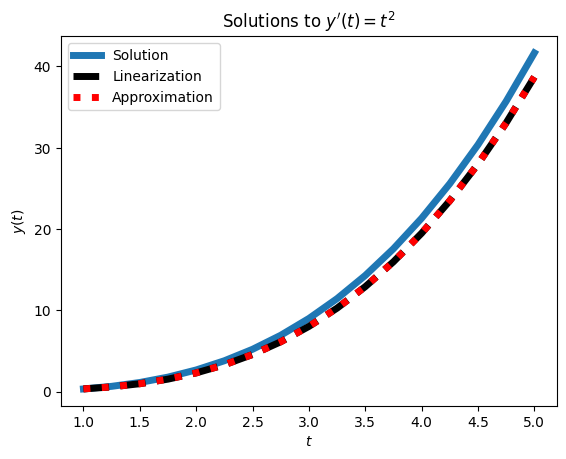

In [5]:
c = 0
yPrime = lambda t: t**2
y = lambda t: c + (t**3)/3
solveODE(0.25, 1, 5, yPrime, y, r"Solutions to $y'(t)=t^2$")

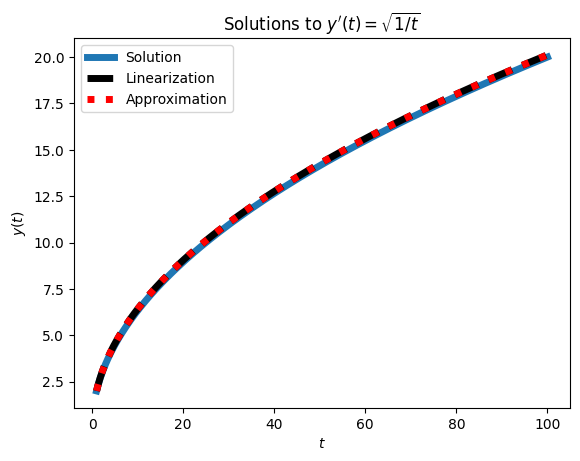

In [6]:
c = 0
rho_t0 = 1./(8. * np.pi)
yPrime = lambda t: np.sqrt((8. * np.pi * rho_t0)/t)
y = lambda t: c + 2 / (np.sqrt(1/t))
# y = lambda t: ((3./2.) * t * np.sqrt(8. * np.pi * rho_t0))**(2./3.)
solveODE(.25, 1, 100, yPrime, y, r"Solutions to $y'(t)=\sqrt{1/t}$")